# Лабораторная работа №1. Подготовка и нормализация данных

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('hotel_bookings.csv', sep = ',')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Визуализация значимых признаков


In [6]:
df.columns
# df.rename(columns={'stays_in_week_nights':'stays_in_weekdays_nights'})
df['stays_in_weeks_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df.info()

   # row['stays_in_week_nights'] = row['stays_in_weekdays_nights'] + row['stays_in_week_nights']
#df['stays_in_week_nights'] = df.apply(lambda row: row.stays_in_weekdays_nights + row.stays_in_weekdays_nights, axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Гистограммы

In [7]:
import matplotlib
import matplotlib.pyplot as plt

22321

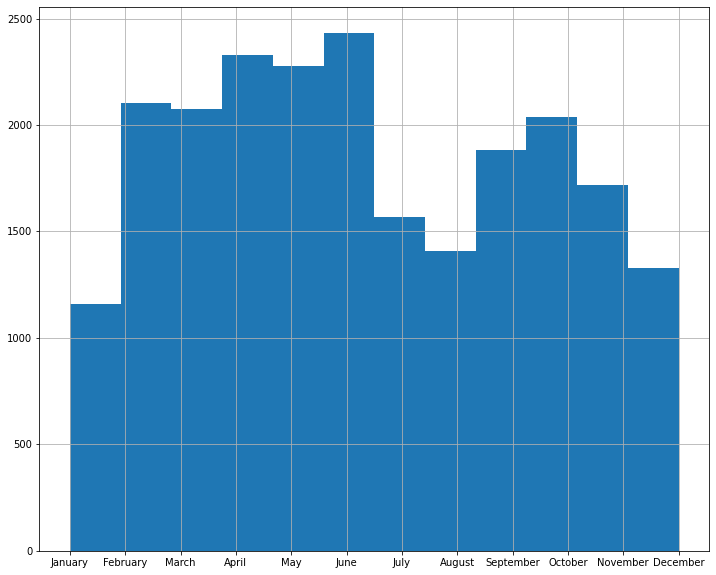

In [8]:
df[(df['arrival_date_year'] == 2016) & (df['country'] == 'PRT')]['arrival_date_month'].hist(figsize=(12,10), bins=12)
df[(df['arrival_date_year'] == 2016) & (df['country'] == 'PRT')]['arrival_date_month'].count()

In [9]:
# df[(df['arrival_date_year'] == 2016) & (df['country'] == 'PRT')]['lead_time'].hist(figsize=(12,10), bins=12)
df = df[(df['country'] == 'PRT')]

<Axes: >

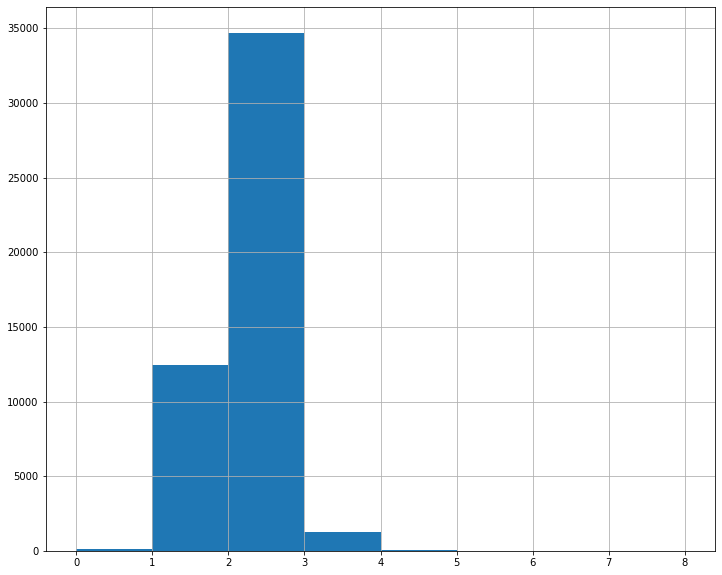

In [10]:
df['adults'].hist(figsize=(12,10), bins = 8, range=(min(df['adults']), 8))

<Axes: >

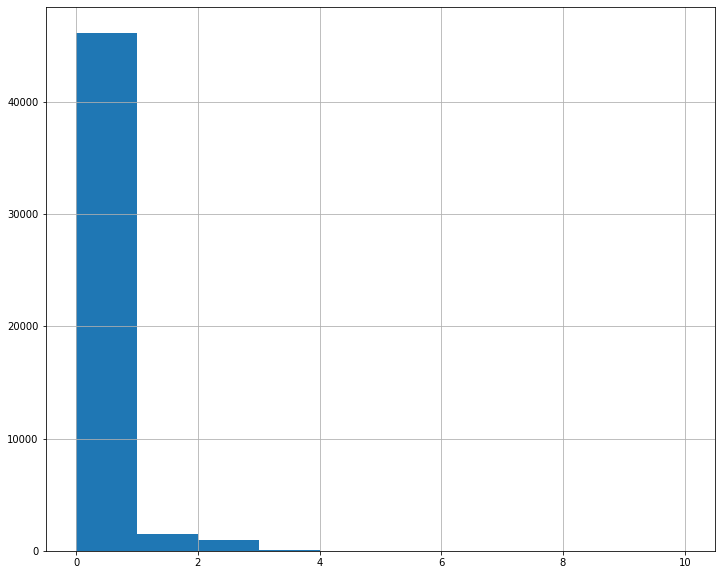

In [11]:
df['children'].hist(figsize=(12,10), bins = int(max(df['children'])))

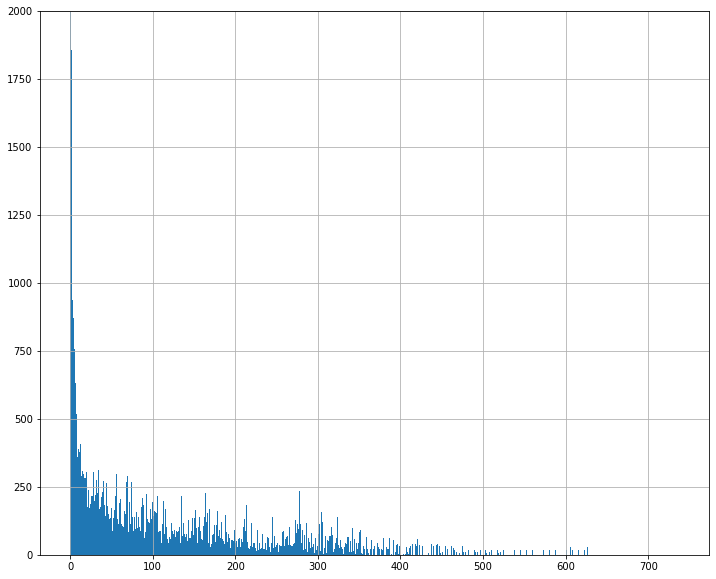

In [12]:
df['lead_time'].hist(figsize=(12,10), bins = max(df['lead_time']))
plt.ylim(0, 2000)
plt.show()

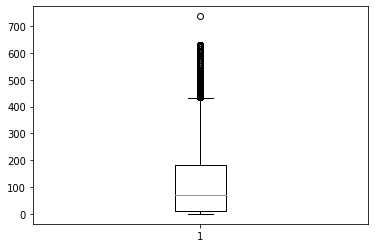

Медиана: 72.0, 0,25-квантиль: 12.0, 0,75-квантиль: 181.0


In [13]:
plt.boxplot(df['lead_time'])
plt.show()
print('Медиана: {0}, 0,25-квантиль: {1}, 0,75-квантиль: {2}'
      .format(df['lead_time'].median(), df['lead_time'].quantile(.25), df['lead_time'].quantile(.75 )))

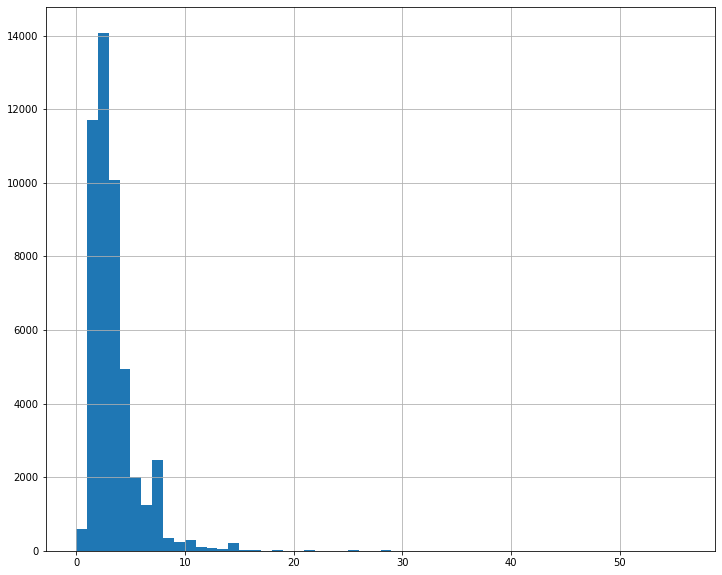

In [14]:
df['stays_in_weeks_nights'].hist(figsize=(12,10), bins = max(df['stays_in_weeks_nights']))
plt.show()

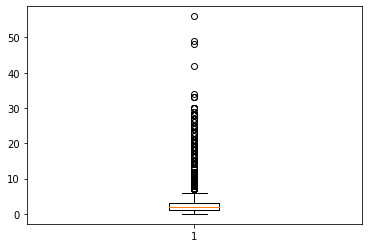

Медиана: 2.0, 0,25-квантиль: 1.0, 0,75-квантиль: 3.0


In [15]:
plt.boxplot(x=df['stays_in_weeks_nights'])
plt.show()
print('Медиана: {0}, 0,25-квантиль: {1}, 0,75-квантиль: {2}'
      .format(df['stays_in_weeks_nights'].median(), df['stays_in_weeks_nights'].quantile(.25), df['stays_in_weeks_nights'].quantile(.75 )))

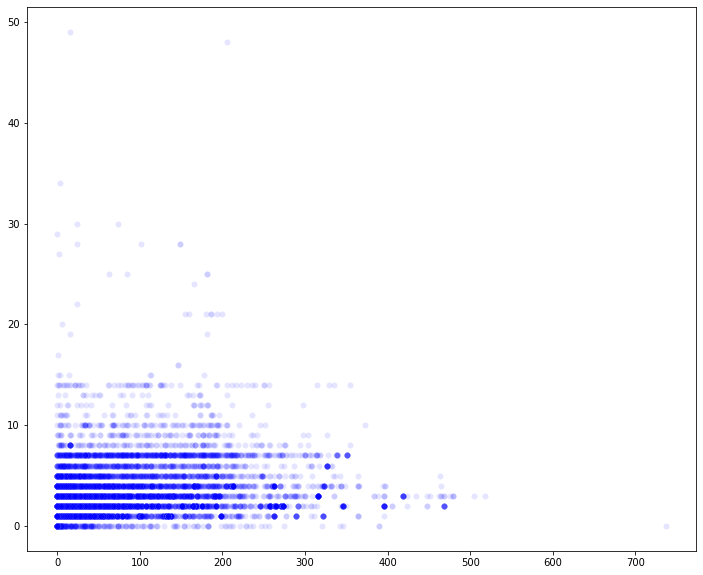

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(df[df['is_canceled'] == 0]['lead_time'], df[df['is_canceled'] == 0]['stays_in_weeks_nights'], color = 'blue', edgecolors = "white", linewidths = 0.2, alpha = 0.1)

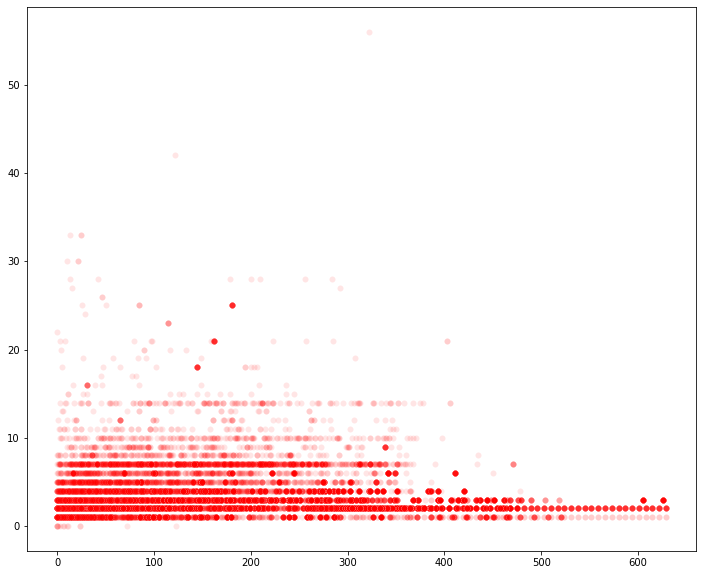

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(df[df['is_canceled'] == 1]['lead_time'], df[df['is_canceled'] == 1]['stays_in_weeks_nights'], color='red', edgecolors = "white", linewidths = 0.2, alpha = 0.1)

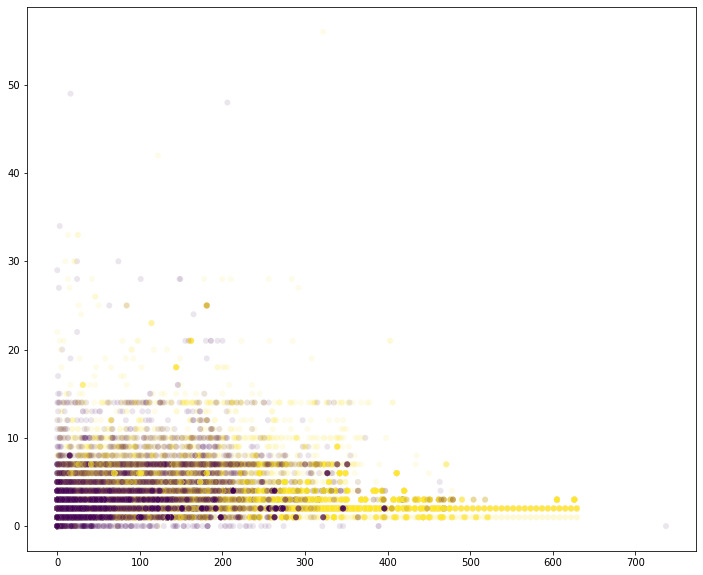

In [18]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(df['lead_time'], df['stays_in_weeks_nights'], c=df['is_canceled'], edgecolors = "white", linewidths = 0.2, alpha = 0.1)

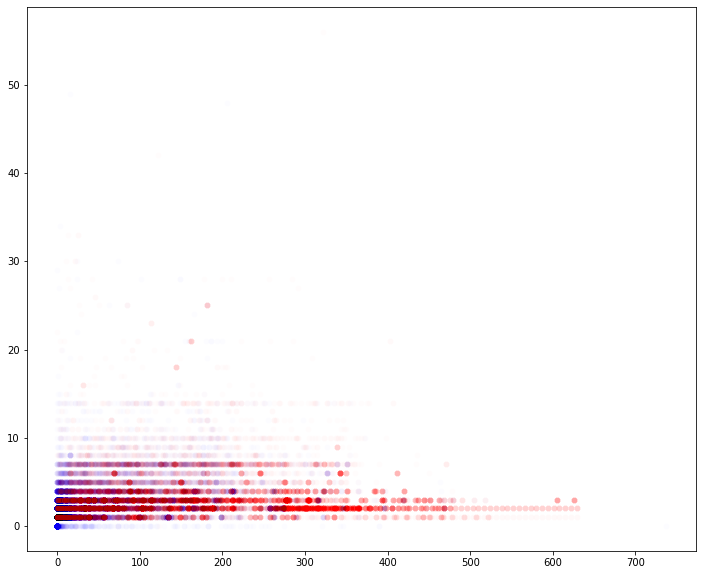

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(df[df['is_canceled'] == 0]['lead_time'], df[df['is_canceled'] == 0]['stays_in_weeks_nights'], color = 'blue', edgecolors = "white", linewidths = 0.2, alpha = 0.01)
plt.scatter(df[df['is_canceled'] == 1]['lead_time'], df[df['is_canceled'] == 1]['stays_in_weeks_nights'], color='red', edgecolors = "white", linewidths = 0.2, alpha = 0.01)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_15076\341561193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deposit_type_num'] = 0 + (df['deposit_type'] == 'Non Refund')


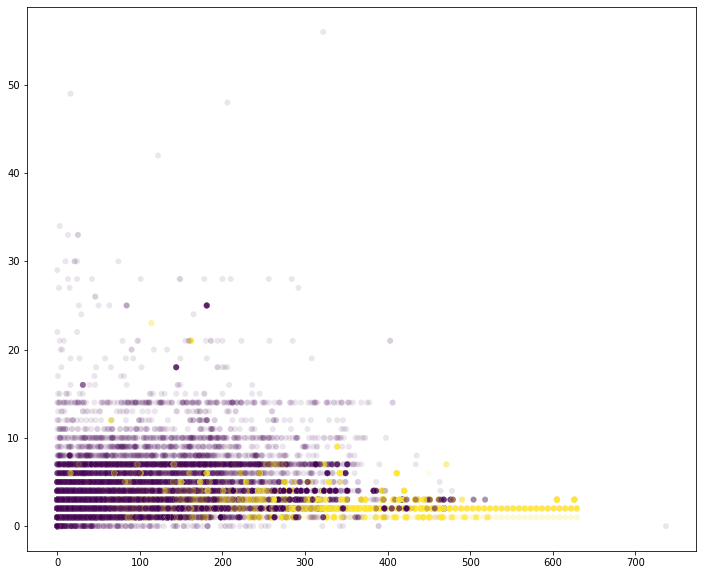

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))
df['deposit_type_num'] = 0 + (df['deposit_type'] == 'Non Refund')
plt.scatter(df['lead_time'], df['stays_in_weeks_nights'], c=df['deposit_type_num'], edgecolors = "white", linewidths = 0.2, alpha = 0.1)

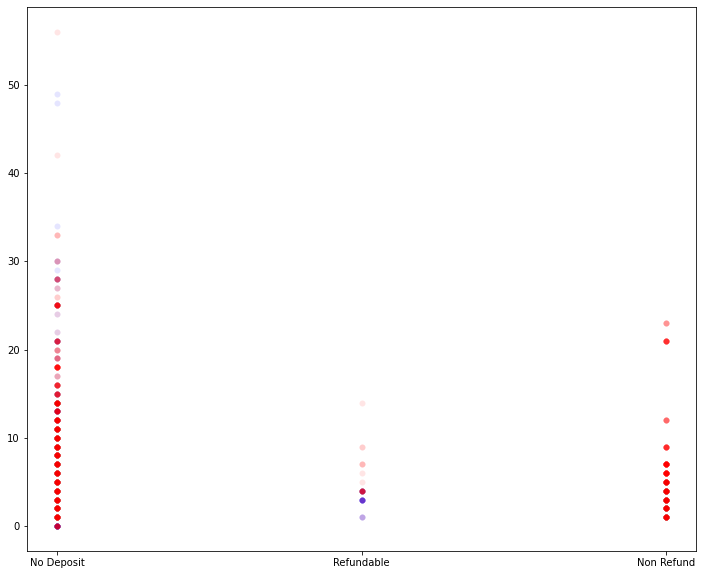

In [21]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(df[df['is_canceled'] == 0]['deposit_type'], df[df['is_canceled'] == 0]['stays_in_weeks_nights'], color = 'blue', edgecolors = "white", linewidths = 0.2, alpha = 0.1)
plt.scatter(df[df['is_canceled'] == 1]['deposit_type'], df[df['is_canceled'] == 1]['stays_in_weeks_nights'], color='red', edgecolors = "white", linewidths = 0.2, alpha = 0.1)
plt.show()

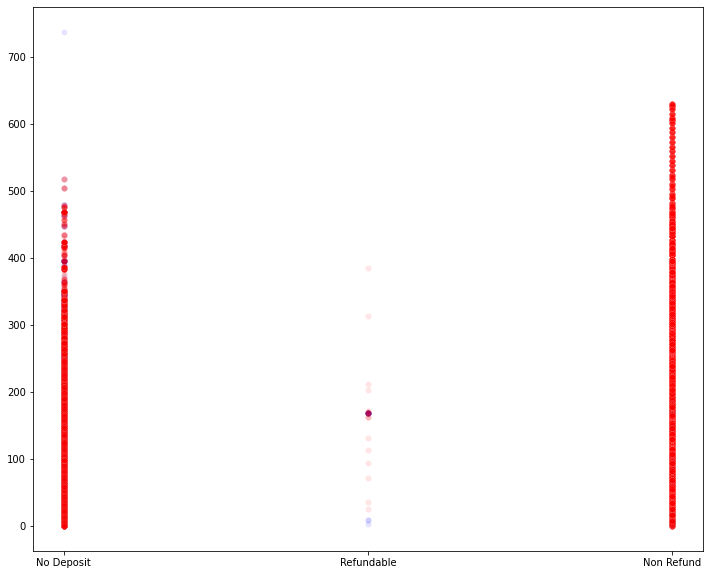

In [22]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(df[df['is_canceled'] == 0]['deposit_type'], df[df['is_canceled'] == 0]['lead_time'], color = 'blue', edgecolors = "white", linewidths = 0.2, alpha = 0.1)
plt.scatter(df[df['is_canceled'] == 1]['deposit_type'], df[df['is_canceled'] == 1]['lead_time'], color='red', edgecolors = "white", linewidths = 0.2, alpha = 0.1)
plt.show()

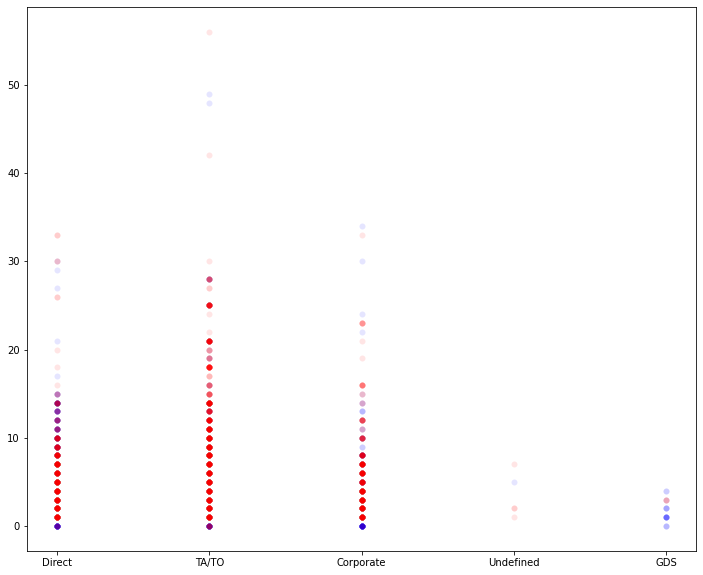

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(df[df['is_canceled'] == 0]['distribution_channel'], df[df['is_canceled'] == 0]['stays_in_weeks_nights'], color = 'blue', edgecolors = "white", linewidths = 0.2, alpha = 0.1)
plt.scatter(df[df['is_canceled'] == 1]['distribution_channel'], df[df['is_canceled'] == 1]['stays_in_weeks_nights'], color='red', edgecolors = "white", linewidths = 0.2, alpha = 0.1)
plt.show()

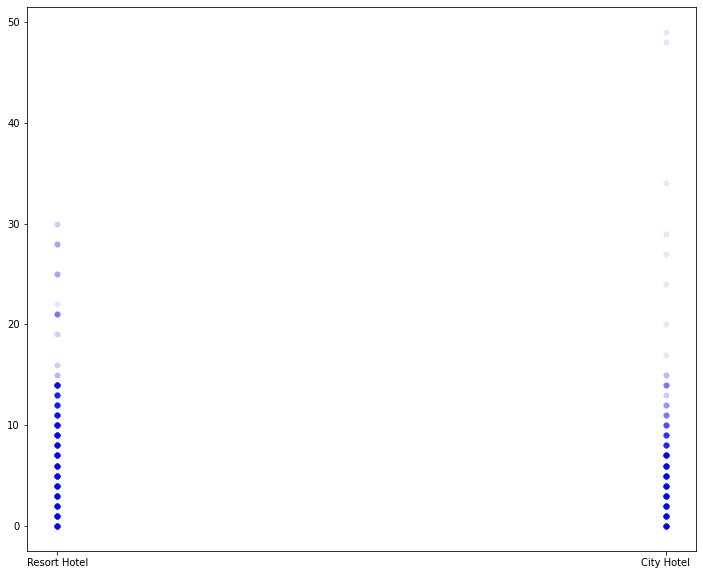

In [24]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(df[df['is_canceled'] == 0]['hotel'], df[df['is_canceled'] == 0]['stays_in_weeks_nights'], color = 'blue', edgecolors = "white", linewidths = 0.2, alpha = 0.1)
#plt.scatter(df[df['is_canceled'] == 1]['hotel'], df[df['is_canceled'] == 1]['stays_in_weeks_nights'], color='red', edgecolors = "white", linewidths = 0.2, alpha = 0.1)
plt.show()

<Axes: >

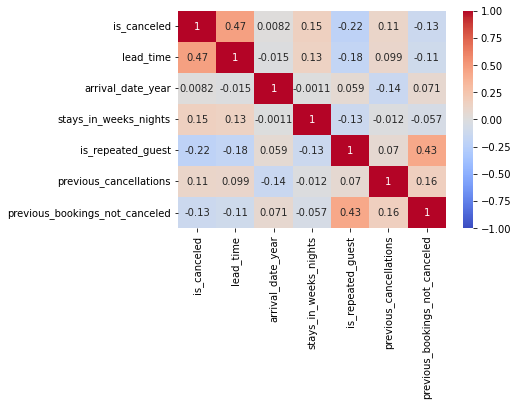

In [26]:
df1 = df[['is_canceled', 'lead_time', 'arrival_date_year', 'stays_in_weeks_nights', 
          'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled']]
sns.heatmap(df1.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

In [27]:
normalized_df=(df1-df1.min())/(df1.max()-df1.min())
normalized_df

,is_canceled,lead_time,arrival_date_year,stays_in_weeks_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled
0,0.0,0.464043,0.0,0.000000,0.0,0.0,0.0
1,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0
6,0.0,0.000000,0.0,0.035714,0.0,0.0,0.0
7,0.0,0.012212,0.0,0.035714,0.0,0.0,0.0
8,1.0,0.115332,0.0,0.053571,0.0,0.0,0.0
...,...,...,...,...,...,...,...
119317,0.0,0.255088,1.0,0.071429,0.0,0.0,0.0
119340,0.0,0.149254,1.0,0.089286,0.0,0.0,0.0
119357,0.0,0.063772,1.0,0.071429,0.0,0.0,0.0
119366,0.0,0.284939,1.0,0.125000,0.0,0.0,0.0


<Axes: >

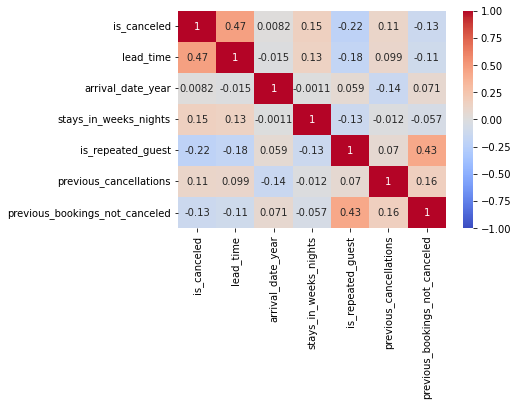

In [28]:
sns.heatmap(normalized_df.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

In [29]:
normalized_df=(df1-df1.mean())/df1.std()
normalized_df

,is_canceled,lead_time,arrival_date_year,stays_in_weeks_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled
0,-1.142797,1.827332,-1.350432,-1.235160,-0.26773,-0.162854,-0.131854
1,-1.142797,5.015047,-1.350432,-1.235160,-0.26773,-0.162854,-0.131854
6,-1.142797,-0.932665,-1.350432,-0.387794,-0.26773,-0.162854,-0.131854
7,-1.142797,-0.860033,-1.350432,-0.387794,-0.26773,-0.162854,-0.131854
8,0.875028,-0.246701,-1.350432,0.035890,-0.26773,-0.162854,-0.131854
...,...,...,...,...,...,...,...
119317,-1.142797,0.584526,1.369746,0.459573,-0.26773,-0.162854,-0.131854
119340,-1.142797,-0.044947,1.369746,0.883256,-0.26773,-0.162854,-0.131854
119357,-1.142797,-0.553367,1.369746,0.459573,-0.26773,-0.162854,-0.131854
119366,-1.142797,0.762070,1.369746,1.730623,-0.26773,-0.162854,-0.131854


<Axes: >

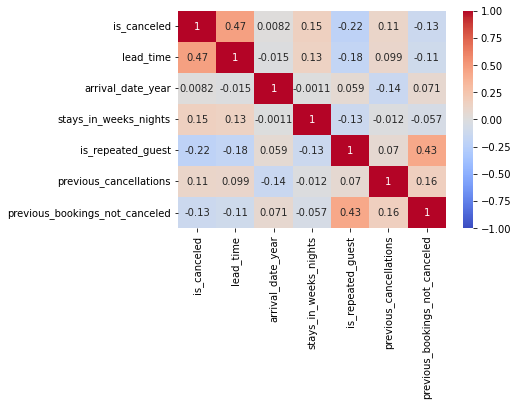

In [30]:
sns.heatmap(normalized_df.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

In [ ]:
df.info()

In [31]:
df = df.drop_duplicates()
df.dropna(subset=['lead_time', 'arrival_date_year'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27453 entries, 0 to 119367
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           27453 non-null  object 
 1   is_canceled                     27453 non-null  int64  
 2   lead_time                       27453 non-null  int64  
 3   arrival_date_year               27453 non-null  int64  
 4   arrival_date_month              27453 non-null  object 
 5   arrival_date_week_number        27453 non-null  int64  
 6   arrival_date_day_of_month       27453 non-null  int64  
 7   stays_in_weekend_nights         27453 non-null  int64  
 8   stays_in_week_nights            27453 non-null  int64  
 9   adults                          27453 non-null  int64  
 10  children                        27449 non-null  float64
 11  babies                          27453 non-null  int64  
 12  meal                           

In [ ]:
import seaborn as sns
